In [107]:

import re
import numpy as np
import sys
import math
import matplotlib.pyplot as plt

filename = 'sumedh_garage.sub'
# filename = '17314.sub'

data = []
with open(filename, 'r') as f:
    for line in f:
        m = re.match(r'RAW_Data:\s*([-0-9 ]+)\s*$', line)

        if m:
            data.extend([ int(seg) for seg in m[1].split(r' ') if seg != ''])

accumulated_time = 0
absolute_times = [0]
bit_values = [1]

for time_interval in data:
    absolute_times.append(accumulated_time)
    # absolute_times.append(accumulated_time)
    accumulated_time += abs(time_interval)

    if time_interval > 0:
        bit_values.append(1)
        # bit_values.append(0)
    else:
        bit_values.append(0)
        # bit_values.append(1)

# convert to ms
absolute_times = [x / 1000 for x in absolute_times]

# big wave (sumedh)
start_index = 3724
end_index = 6645

absolute_times = absolute_times[start_index:end_index]
data = data[start_index:]
bit_values = bit_values[start_index:end_index]
absolute_times = [x - absolute_times[0] for x in absolute_times]


In [108]:
# print large gaps in absolute time
threshold = 10
for i in range(1, len(absolute_times)):
    if absolute_times[i] - absolute_times[i-1] > threshold:
        print(f'Large gap between times {absolute_times[i-1]} and {absolute_times[i]}, indices {i-1} to {i}, t = {absolute_times[i] - absolute_times[i-1]}')

Large gap between times 0.0 and 176.61200000000008, indices 0 to 1, t = 176.61200000000008
Large gap between times 239.096 and 261.36199999999985, indices 244 to 245, t = 22.26599999999985
Large gap between times 383.6479999999999 and 404.12200000000007, indices 576 to 577, t = 20.47400000000016
Large gap between times 722.2189999999998 and 737.213, indices 1634 to 1635, t = 14.994000000000142
Large gap between times 1176.599 and 1193.5330000000001, indices 2682 to 2683, t = 16.934000000000196
Large gap between times 1328.947 and 1345.8329999999999, indices 2730 to 2731, t = 16.885999999999967
Large gap between times 1481.2230000000002 and 1498.1050000000002, indices 2778 to 2779, t = 16.882000000000062
Large gap between times 1633.499 and 1650.3729999999998, indices 2826 to 2827, t = 16.873999999999796
Large gap between times 1785.785 and 1802.6830000000002, indices 2874 to 2875, t = 16.89800000000014


In [109]:
# small wave
start_index_1 = 2682
end_index_1 = 2731
start_index_2 = 2730
end_index_2 = 2779
start_index_3 = 2778
end_index_3 = 2827

absolute_times_1 = absolute_times[start_index_1:end_index_1]
bit_values_1 = bit_values[start_index_1:end_index_1]
absolute_times_1 = [x - absolute_times_1[0] for x in absolute_times_1]

absolute_times_2 = absolute_times[start_index_2:end_index_2]
bit_values_2 = bit_values[start_index_2:end_index_2]
absolute_times_2 = [x - absolute_times_2[0] for x in absolute_times_2]

absolute_times_3 = absolute_times[start_index_3:end_index_3]
bit_values_3 = bit_values[start_index_3:end_index_3]
absolute_times_3 = [x - absolute_times_3[0] for x in absolute_times_3]

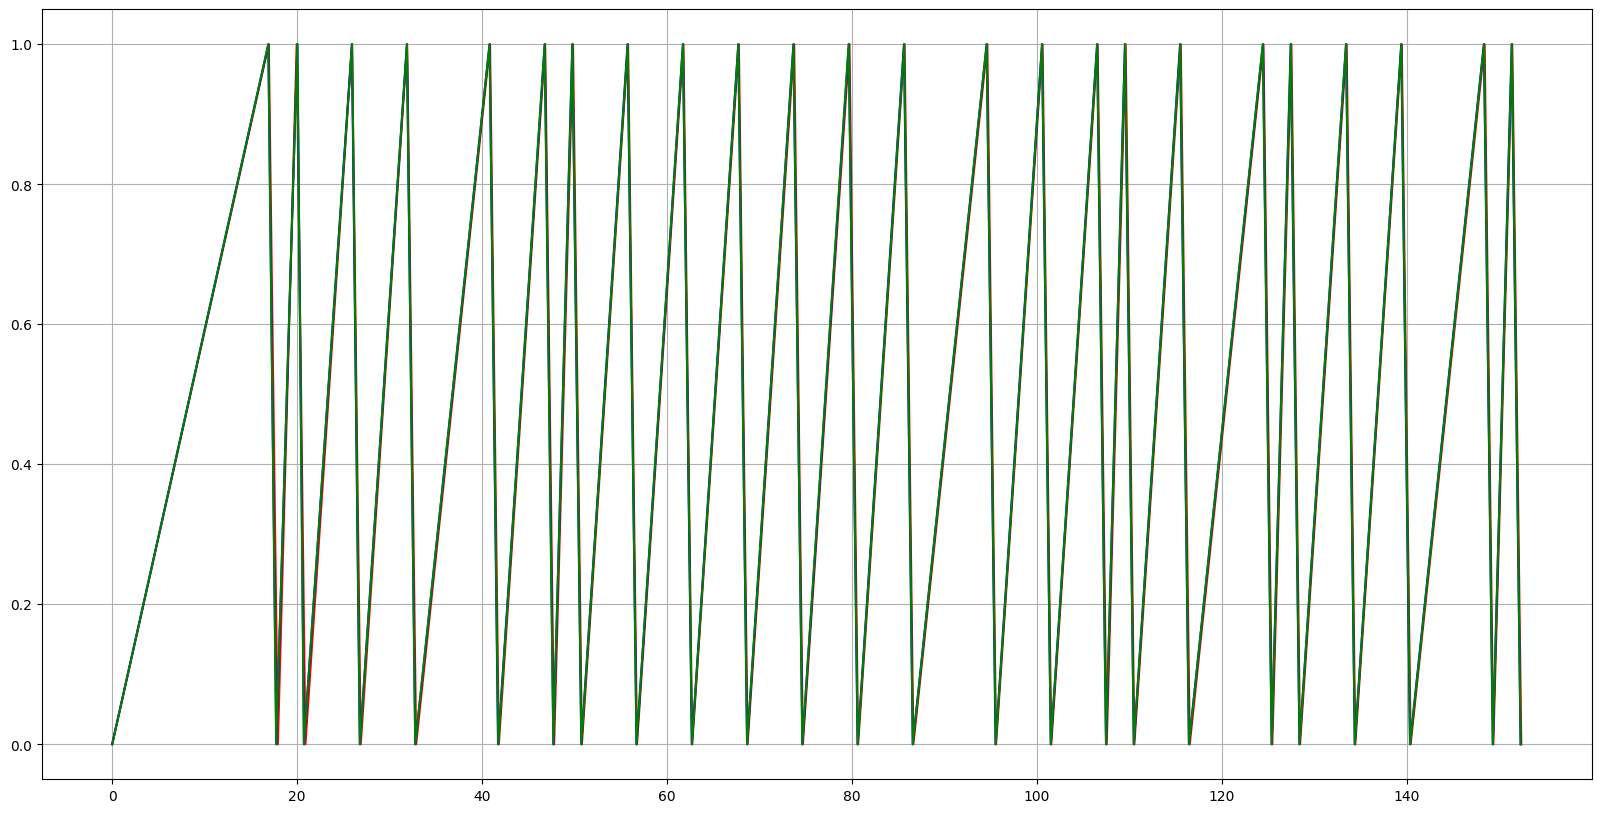

In [110]:
plt.figure(figsize=(20, 10))
plt.plot(absolute_times_1, bit_values_1, label='1', color='red')
plt.plot(absolute_times_2, bit_values_2, label='2', color='blue')
plt.plot(absolute_times_3, bit_values_3, label='3', color='green')
# plt.xticks(np.arange(0, absolute_times[-1], 100))
plt.grid()
plt.show()

In [111]:
new_data = data[start_index_1-2:end_index_3+2]
print(new_data)

[913, -16934, 981, -2034, 947, -5040, 941, -5016, 973, -7988, 951, -5010, 969, -2040, 961, -4994, 963, -5022, 949, -5044, 941, -5040, 939, -5038, 937, -5020, 953, -7998, 941, -5026, 941, -5016, 981, -2046, 943, -5016, 973, -7968, 959, -2060, 939, -5036, 935, -5024, 961, -8000, 939, -2048, 973, -16886, 863, -2276, 717, -5176, 855, -5094, 903, -8034, 913, -5054, 937, -2042, 971, -5002, 971, -5020, 953, -5030, 951, -5010, 969, -5020, 943, -5016, 951, -7992, 959, -5024, 949, -5006, 973, -2036, 963, -5000, 959, -8002, 943, -2058, 945, -5040, 939, -5026, 943, -7990, 973, -2036, 963, -16882, 847, -2294, 699, -5214, 849, -5080, 899, -8038, 939, -5014, 939, -2066, 967, -5016, 941, -5022, 979, -5012, 943, -5028, 945, -5012, 981, -5020, 937, -7982, 983, -5012, 939, -5022, 943, -2068, 941, -5026, 943, -7978, 965, -2074, 935, -5024, 955, -5028, 953, -7988, 945, -2066, 943, -16874, 871, -2280, 727]
